In [45]:
import yfinance as yf
import pandas as pd
import plotly.graph_objects as plt
import datetime
pd.options.mode.copy_on_write = True

In [46]:
df = yf.download('WIPRO.NS', start = '2024-02-09', end='2025-02-09', interval='1d')

[*********************100%***********************]  1 of 1 completed


In [47]:
data=df.copy()

In [48]:
data

Price,Close,High,Low,Open,Volume
Ticker,WIPRO.NS,WIPRO.NS,WIPRO.NS,WIPRO.NS,WIPRO.NS
Date,,,,,
2024-02-09,240.447113,242.555217,236.672119,240.667720,7893788
2024-02-12,245.839966,250.423868,240.716762,240.716762,48873500
2024-02-13,250.816071,251.502429,241.059936,246.648876,22373576
2024-02-14,252.237823,253.463469,243.682813,247.065606,22594656
2024-02-15,254.198853,256.331464,251.526940,253.438958,14570776
...,...,...,...,...,...
2025-02-03,313.600006,314.000000,300.299988,303.000000,14877076
2025-02-04,316.250000,318.850006,313.350006,318.000000,15366864


In [49]:
data.columns.get_level_values(0)

Index(['Close', 'High', 'Low', 'Open', 'Volume'], dtype='object', name='Price')

In [50]:
data.columns

MultiIndex([( 'Close', 'WIPRO.NS'),
            (  'High', 'WIPRO.NS'),
            (   'Low', 'WIPRO.NS'),
            (  'Open', 'WIPRO.NS'),
            ('Volume', 'WIPRO.NS')],
           names=['Price', 'Ticker'])

In [51]:
data.columns = data.columns.get_level_values(0)

In [52]:
data

Price,Close,High,Low,Open,Volume
Date,,,,,
2024-02-09,240.447113,242.555217,236.672119,240.667720,7893788
2024-02-12,245.839966,250.423868,240.716762,240.716762,48873500
2024-02-13,250.816071,251.502429,241.059936,246.648876,22373576
2024-02-14,252.237823,253.463469,243.682813,247.065606,22594656
2024-02-15,254.198853,256.331464,251.526940,253.438958,14570776
...,...,...,...,...,...
2025-02-03,313.600006,314.000000,300.299988,303.000000,14877076
2025-02-04,316.250000,318.850006,313.350006,318.000000,15366864
2025-02-05,317.100006,321.450012,314.899994,317.799988,9628027


In [53]:
data.index

DatetimeIndex(['2024-02-09', '2024-02-12', '2024-02-13', '2024-02-14',
               '2024-02-15', '2024-02-16', '2024-02-19', '2024-02-20',
               '2024-02-21', '2024-02-22',
               ...
               '2025-01-27', '2025-01-28', '2025-01-29', '2025-01-30',
               '2025-01-31', '2025-02-03', '2025-02-04', '2025-02-05',
               '2025-02-06', '2025-02-07'],
              dtype='datetime64[ns]', name='Date', length=247, freq=None)

In [54]:
data['Close']

,Close
Date,
2024-02-09,240.447113
2024-02-12,245.839966
2024-02-13,250.816071
2024-02-14,252.237823
2024-02-15,254.198853
...,...
2025-02-03,313.600006
2025-02-04,316.250000
2025-02-05,317.100006


In [55]:
data['SMA_Long']=data['Close'].rolling(window=50).mean()
data['SMA_Short'] = data['Close'].rolling(window=7).mean()

#data=data.dropna()

<Axes: xlabel='Date'>

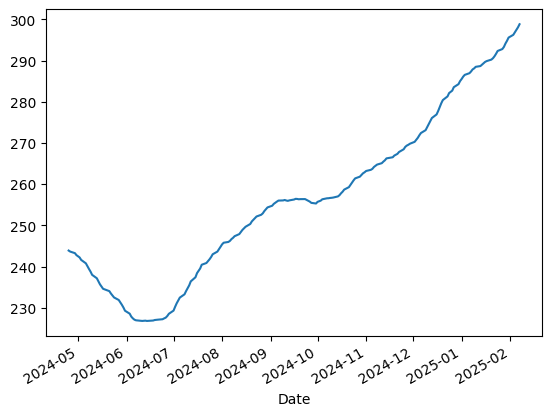

In [56]:
data['SMA_Long'].plot()

<Axes: xlabel='Date'>

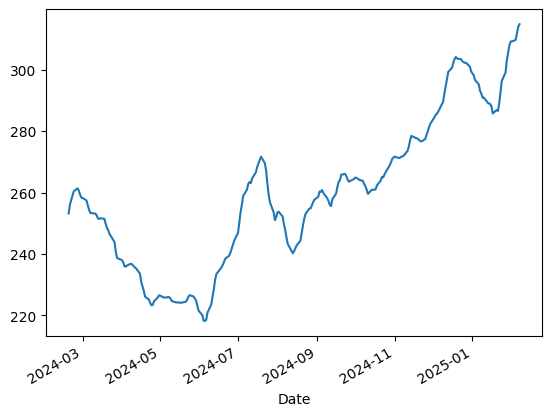

In [57]:
data['SMA_Short'].plot()

In [58]:
data['Position'] = 0

####its not long (i.e. buy!!, when we buy some stock, we say I am long on this stock), this is window wise longer in compared to shorter SMA

In [59]:
data.loc[data['SMA_Short'] > data['SMA_Long'], 'Position']=1 #not short sell!!! shorter by its window in comparison to the longer SMA!

####sorry, a mistake, -1 is used for short-selling, for exit its 0 itself, i.e. out of market -> 1 to enter and 0 to exit!!

#####If we take exit as '-1' our return will become negative!! as it depends on 'Position' as:

#####data['Strategy_Returns'] = data['Position'].shift(1) * data['Returns']

In [60]:
data.loc[data['SMA_Short']<= data['SMA_Long'],'Position']= 0

In [61]:
#it can be done by this way as well, but I realised a more smart way to do it, at last we just want the returuns only, hence we'll calculate the strategy returns directly,
#and rather than taking quantities we can directly multiply our returns with our money/capital to get the final amount!!

#we don't need to store our buy price and sell price until and unless we want to print the whole trade book (i.e. list of all trades happened)

#money = 10000

#buy_price=data.loc[data['Position']==1]['Close'].values

In [62]:
#money//(buy_price)

In [63]:
#just take the percentage difference to get the returns!! (didn't understood? Okay!! -> 100rs. to 200rs. will be (200-100)/100 *100% i.e. 100%!!, or 50rs. to 25rs. will be (25-50)/50*100=-50%)
data['Returns'] = data['Close'].pct_change()
data['Returns']

,Returns
Date,
2024-02-09,NaN
2024-02-12,0.022428
2024-02-13,0.020241
2024-02-14,0.005669
2024-02-15,0.007775
...,...
2025-02-03,0.005451
2025-02-04,0.008450
2025-02-05,0.002688


In [64]:
#now we want the returns for the days where we took the trade!!!
data['Trade'] = data['Position'].diff() #to identify when a change in trade occurs! (i.e. buy to sell)


#the strategy return is calculated by shifting the position by one day (shift(1)) to prevent the look-ahead bias, ensuring that ywe only use information available at the time of the trade.
data['Strategy_Returns'] = data['Position'].shift(1) * data['Returns']

In [65]:
data['Cumulative_Returns'] = (1 + data['Returns']).cumprod() - 1
data['Cumulative_Strategy_Returns'] = (1 + data['Strategy_Returns']).cumprod() - 1

In [66]:
data

Price,Close,High,Low,Open,Volume,SMA_Long,SMA_Short,Position,Returns,Trade,Strategy_Returns,Cumulative_Returns,Cumulative_Strategy_Returns
Date,,,,,,,,,,,,,
2024-02-09,240.447113,242.555217,236.672119,240.667720,7893788,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN
2024-02-12,245.839966,250.423868,240.716762,240.716762,48873500,NaN,NaN,0,0.022428,0.0,0.000000,0.022428,0.000000
2024-02-13,250.816071,251.502429,241.059936,246.648876,22373576,NaN,NaN,0,0.020241,0.0,0.000000,0.043124,0.000000
2024-02-14,252.237823,253.463469,243.682813,247.065606,22594656,NaN,NaN,0,0.005669,0.0,0.000000,0.049037,0.000000
2024-02-15,254.198853,256.331464,251.526940,253.438958,14570776,NaN,NaN,0,0.007775,0.0,0.000000,0.057192,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-02-03,313.600006,314.000000,300.299988,303.000000,14877076,296.265666,309.480473,1,0.005451,0.0,0.005451,0.304237,0.097653
2025-02-04,316.250000,318.850006,313.350006,318.000000,15366864,296.879648,309.821433,1,0.008450,0.0,0.008450,0.315258,0.106928
2025-02-05,317.100006,321.450012,314.899994,317.799988,9628027,297.446407,311.985718,1,0.002688,0.0,0.002688,0.318793,0.109903


In [67]:
import plotly.graph_objects as go

total_returns = data['Cumulative_Returns'].iloc[-1]
total_strategy_returns = data['Cumulative_Strategy_Returns'].iloc[-1]

print(f"Total Returns: {total_returns*100:4f}%") #total return of the stock, simple buy at start and hold till end
print(f"Total Strategy Return: {total_strategy_returns*100:.4f}%") #return from the strategy

fig = go.Figure()

fig.add_trace(go.Scatter(x=data.index, y=data['Close'], mode='lines', name='Close Price', line=dict(color='blue', width=1)))

#short moving average
fig.add_trace(go.Scatter(x=data.index, y=data['SMA_Short'], mode='lines', name='Short MA (7 days)', line=dict(color='red', width=1)))

#long moving average
fig.add_trace(go.Scatter(x=data.index, y=data['SMA_Long'], mode='lines', name='Long MA (50 days)', line=dict(color='green', width=1)))

#buy signals
fig.add_trace(go.Scatter(x=data.index[data['Trade'] == 1], y=data['Close'][data['Trade'] == 1], mode='markers', name='Buy Signal', marker=dict(symbol='triangle-up', size=10, color='green')))

#sell signals ..exiting, not short-selling)
fig.add_trace(go.Scatter(x=data.index[data['Trade'] == -1], y=data['Close'][data['Trade'] == -1], mode='markers', name='Exit Signal', marker=dict(symbol='triangle-down', size=10, color='red')))

fig.update_layout(
    title='WIPRO.NS Stock Price and Moving Averages with Buy/Exit Signals',
    xaxis_title='Date',
    yaxis_title='Price (INR)',
    legend_title='Legend',
    template='plotly_dark',
    hovermode='x unified'
)

fig.show()

Total Returns: 32.253615%
Total Strategy Return: 11.3054%


In [68]:
fig = go.Figure()

#plot strategy cumulative returns
fig.add_trace(go.Scatter(
    x=data.index,
    y=data['Cumulative_Strategy_Returns'],
    mode='lines',
    name='Strategy Returns'
))

#plot market (buy and hold) cumulative returns
fig.add_trace(go.Scatter(
    x=data.index,
    y=data['Cumulative_Returns'],
    mode='lines',
    name='Market Returns'
))

fig.update_layout(
    title="Cumulative Returns: Strategy vs Market",
    xaxis_title="Date",
    yaxis_title="Cumulative Returns",
    legend_title="Legend"
)

fig.show()

In [69]:
#oops simple buy and hold is performing better than our strategy, so let's optimise our strategy?

In [70]:
def ma_crossover_strategy(df, short_window=5, long_window=20):
    df.columns = df.columns.get_level_values(0)

    #calculate moving averages
    df['SMA_Short'] = df['Close'].rolling(window=short_window).mean()
    df['SMA_Long'] = df['Close'].rolling(window=long_window).mean()

    #initialize positions
    df['Position'] = 0

    #generate signals
    df.loc[df['SMA_Short'] > df['SMA_Long'], 'Position'] = 1  #buy signal
    df.loc[df['SMA_Short'] <= df['SMA_Long'], 'Position'] = 0  #sell signal

    #calculate daily returns
    df['Returns'] = df['Close'].pct_change()

    #calculate strategy returns
    df['Strategy_Returns'] = df['Position'].shift(1) * df['Returns']

    df['Cumulative_Returns'] = (1 + df['Returns']).cumprod() - 1
    df['Cumulative_Strategy_Returns'] = (1 + df['Strategy_Returns']).cumprod() - 1

    #track transactions
    df['Trade'] = df['Position'].diff()

    return df

import numpy as np
best_return = -np.inf
best_params = None

for short_window in range(3, 50):
    for long_window in range(short_window+10, 200):
        result =  ma_crossover_strategy(data.copy(), short_window, long_window)
        total_return = (1 + result['Strategy_Returns']).cumprod().iloc[-1] - 1

        if total_return > best_return:
            best_return = total_return
            best_params = (short_window, long_window)

best_params

(22, 59)

In [71]:
#it will be a bit different from previous data, why? Because there will be different no. of NaN values from previous data (Long and Short window are diff!!)

opt_data=df.copy()

opt_data=ma_crossover_strategy(opt_data, short_window=best_params[0], long_window=best_params[1])

total_returns = opt_data['Cumulative_Returns'].iloc[-1]
total_strategy_returns = opt_data['Cumulative_Strategy_Returns'].iloc[-1]

print(f"Total Returns: {total_returns*100:.2f}%")
print(f"Total Strategy Return: {total_strategy_returns*100:.2f}%")

fig = go.Figure()

fig.add_trace(go.Scatter(
    x=opt_data.index,
    y=opt_data['Cumulative_Strategy_Returns'],
    mode='lines',
    name='Strategy Returns'
))

fig.add_trace(go.Scatter(
    x=opt_data.index,
    y=opt_data['Cumulative_Returns'],
    mode='lines',
    name='Market Returns'
))

fig.update_layout(
    title="Cumulative Returns: Strategy vs Market",
    xaxis_title="Date",
    yaxis_title="Cumulative Returns",
    legend_title="Legend"
)

fig.show()

Total Returns: 32.25%
Total Strategy Return: 37.43%


###Profit Tripled!!!! But be cautious, it can be an overfit as well! i.e. performing well on train data, but may/will perform worst on the test data!

**Homework:** Divide the time series data in 2 regions, optimise the strategy in first region, get the parameter, now test it on the second region!!

For eg:
Train -> 1 Jan 2023 to 1 Jan 2024
Test -> 2 Jan 2024 to 1 Jan 2025

### Advance Stuff!! No issue if you didn't understood it, we are printing a trade-book

In [72]:
def calculate_performance(data, initial_capital=10000, transaction_fee=10): #our capital = Rs. 10000, and transaction fees= Rs.10 that broker and govt. charges from us
    #buy and sell transactions
    buys = data[data['Trade'] == 1]
    sells = data[data['Trade'] == -1]

    #calculate profit for each buy/sell pair
    trade_details = []  #store details of each trade (buy, sell, profit, etc.)
    capital = initial_capital  #start with initial capital

    for buy_date, buy_row in buys.iterrows():
        #find the corresponding sell signal after the buy signal
        sell = sells[sells.index > buy_date].iloc[0] if not sells[sells.index > buy_date].empty else None
        if sell is not None:
            #calculate number of shares to buy based on current capital
            num_shares = (capital - transaction_fee) // buy_row['Close'] #integer division that we discussed today!! We'll use those stuff here, so at the end, though by mistake but you can understand both results and trade-book too hehe
            buy_cost = num_shares * buy_row['Close'] + transaction_fee #real trade involve costs too!!

            #calculate profit
            profit = (sell['Close'] - buy_row['Close']) / buy_row['Close']
            profit_after_fee = profit * num_shares * buy_row['Close'] - transaction_fee  #account for sell fee
            capital_change = profit_after_fee
            capital += capital_change     #update capital based on each trade profit after fee

            #trade details
            trade_details.append({
                'Buy Date': buy_date.strftime('%Y-%m-%d' ),  #date_format
                'Buy Price': round(buy_row['Close'], 2),          #2_decimals_roundoff
                'Sell Date': sell.name.strftime('%Y-%m-%d'),   #'YYYY-MM-DD'
                'Sell Price': round(sell['Close'], 2),            #round to 2 decimals
                'Number of Shares': int(num_shares),         # total_shares
                'Profit': f"{profit * 100:.2f}%",          #profit
                'Transaction Fee': transaction_fee,            #transaction_fee
                'Capital Change': round(capital_change, 2),      #capital after profit and fees
                'Running Total Capital': round(capital, 2)              #running_total_capital_after_trade
            })

    total_profit = ((capital - initial_capital) / initial_capital) * 100  # Total profit percentage

    return {
        'Trade Details': trade_details,  #trade details
        'Initial Capital': initial_capital,     #our initial capital
        'Final Capital': round(capital, 2),  #final capital after all trades
        'Total Profit': f"{total_profit:.2f}%"    #total profit as percentage
    }

In [75]:
def print_trade_book(data, transaction_fee=0):
  performance=calculate_performance(data, transaction_fee=transaction_fee)

  print(f"\nPerformance Metrics (Trade Details):")
  print(f"{'Buy Date':<12} {'Buy Price':<12} {'Sell Date':<12} {'Sell Price':<12} {'Number of Shares':<17} {'Profit':<8} {'Transaction Fee':<15} {'Capital Change':<15} {'Running Total Capital':<20}")
  for trade in performance['Trade Details']:
      print(f"{trade['Buy Date']:<12} {trade['Buy Price']:<12} {trade['Sell Date']:<12} {trade['Sell Price']:<12} {trade['Number of Shares']:<17} {trade['Profit']:<8} Rs.{trade['Transaction Fee']:<14} Rs.{trade['Capital Change']:<15} Rs.{trade['Running Total Capital']:<20}")

  #print initial capital, final capital, and total profit
  print(f"\nInitial Capital: Rs.{performance['Initial Capital']}")
  print(f"Final Capital: Rs.{performance['Final Capital']}")
  print(f"Total Profit: {performance['Total Profit']}")

In [77]:
print_trade_book(data,transaction_fee=0)


Performance Metrics (Trade Details):
Buy Date     Buy Price    Sell Date    Sell Price   Number of Shares  Profit   Transaction Fee Capital Change  Running Total Capital
2024-06-12   233.8        2024-08-08   238.9        42                2.18%    Rs.0              Rs.214.15          Rs.10214.15            
2024-08-23   251.21       2024-09-11   252.16       40                0.38%    Rs.0              Rs.38.24           Rs.10252.38            
2024-09-13   269.94       2025-01-15   286.95       37                6.30%    Rs.0              Rs.629.44          Rs.10881.83            

Initial Capital: Rs.10000
Final Capital: Rs.10881.83
Total Profit: 8.82%


In [79]:
print_trade_book(data,transaction_fee=10)


Performance Metrics (Trade Details):
Buy Date     Buy Price    Sell Date    Sell Price   Number of Shares  Profit   Transaction Fee Capital Change  Running Total Capital
2024-06-12   233.8        2024-08-08   238.9        42                2.18%    Rs.10             Rs.204.15          Rs.10204.15            
2024-08-23   251.21       2024-09-11   252.16       40                0.38%    Rs.10             Rs.28.24           Rs.10232.38            
2024-09-13   269.94       2025-01-15   286.95       37                6.30%    Rs.10             Rs.619.44          Rs.10851.83            

Initial Capital: Rs.10000
Final Capital: Rs.10851.83
Total Profit: 8.52%


In [81]:
print_trade_book(opt_data,transaction_fee=0)


Performance Metrics (Trade Details):
Buy Date     Buy Price    Sell Date    Sell Price   Number of Shares  Profit   Transaction Fee Capital Change  Running Total Capital
2024-06-21   240.5        2024-08-28   262.09       41                8.98%    Rs.0              Rs.885.43          Rs.10885.43            

Initial Capital: Rs.10000
Final Capital: Rs.10885.43
Total Profit: 8.85%


In [83]:
print_trade_book(opt_data,transaction_fee=10)


Performance Metrics (Trade Details):
Buy Date     Buy Price    Sell Date    Sell Price   Number of Shares  Profit   Transaction Fee Capital Change  Running Total Capital
2024-06-21   240.5        2024-08-28   262.09       41                8.98%    Rs.10             Rs.875.43          Rs.10875.43            

Initial Capital: Rs.10000
Final Capital: Rs.10875.43
Total Profit: 8.75%
